In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/anaconda3/lib/python3.8/site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [10]:
# Set features. This will also be used as your x values.
selected_features = df.drop(["koi_disposition"], axis =1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [15]:
koi_used = df["koi_disposition"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, koi_used, random_state=1)

In [17]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [18]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

In [20]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model -KNN



In [23]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier

In [24]:
 #Create a for loop for the best k
train_score = []
test_score = []
for k in range(1, 30, 2): 
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, y_train)
  train_score.append(model.score(X_train_scaled, y_train))
  test_score.append(model.score(X_test_scaled, y_test))
  print(k, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

1 1.0 0.7866132723112128
3 0.8954796872019836 0.8049199084668193
5 0.8712569139805455 0.8112128146453089
7 0.8617203890902155 0.8180778032036613
9 0.8577150486362769 0.8203661327231121
11 0.8483692542437535 0.830091533180778
13 0.8481785237459469 0.8295194508009154
15 0.8416936868205226 0.830091533180778
17 0.8394049208468434 0.8295194508009154
19 0.835781041388518 0.8306636155606407
21 0.8350181193972916 0.8323798627002288
23 0.8344459279038718 0.8306636155606407
25 0.8292962044630936 0.8266590389016019
27 0.8294869349609002 0.830091533180778
29 0.8285332824718673 0.8306636155606407


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

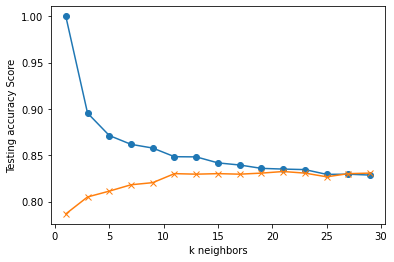

In [25]:
# Plot the score results
import matplotlib.pyplot as plt
plt.plot(range(1, 30, 2), train_score, marker='o')
plt.plot(range(1, 30, 2), test_score, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:

# k=11 was used for the KNN model
model1 = KNeighborsClassifier(n_neighbors=11)
model1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [27]:
print(f"k=11, Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"k=11, Testing Data Score: {model1.score(X_test_scaled, y_test)}")

k=11, Training Data Score: 0.8483692542437535
k=11, Testing Data Score: 0.830091533180778


# Hyperparameter Tuning


In [29]:


model1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [31]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
param_grid = {
    "n_neighbors": range(1, 20, 2),
    "weights": ['uniform', 'distance'],
    "metric": ["euclidean", "manhattan"]
}
print(param_grid)

{'n_neighbors': range(1, 20, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [32]:
# Train the model with GridSearch
# instantiate the grid
grid = GridSearchCV(model1, param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the model using the grid search estimator. 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.4s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=11), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20, 2),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [34]:
# List the best parameters for this dataset
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
0.6755672904667782
KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')


In [35]:
# Testing model
model1 = KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')
model1.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')

In [36]:
print(f"k=17, Testing Data Score: {model1.score(X_test_scaled, y_test)}")

k=17, Testing Data Score: 0.8461098398169337


# Save the Model

In [37]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)

NameError: name 'your_model' is not defined